# Big Data in Astronomy: A reborn for Astroinformatics


<img src="images/cifras.png" width="600" align="middle">

As it is already known the modern observatories like Atacama Large Millimeter/submillimeter Array (ALMA) and Very Long Baseline Array (VLBA) generate large scale data that will be accentuated with the incorporation of new observatories as the Square Kilometre Array (SKA), projecting that by 2020 we will have archived astronomical data in a PB-Scale ($\approx $60 petabyte). But this is not only limited to radio astronomy, on the side of optical astronomy in the case of Integral Field Spectroscopy(IFS) we already have data from The Multi Unit Spectroscopic Explorer (MUSE) in the Very Large Telescope (VLT) with sizes of hundreds of GB. **With which Chile will become the world capital of astronomy.**


## The Large Synoptic Survey Telescope (LSST)
The Large Synoptic Survey Telescope, an optical telescope currently under construction in Chile, will image the entire sky every few nights. It will be so sensitive that it will generate 10 million alerts per night on new or transient sources, leading to a catalog of over 15 petabytes after 10 years.
Source: https://www.smithsonianmag.com/science-nature/next-big-discovery-astronomy-scientists-probably-found-it-years-ago-they-dont-know-it-yet-180969073/#zyKqS3zEIQKtLb58.99

<img src="images/lsst.jpg" width="600" align="middle">

### LSST Facts:


<img src="images/lsst-camara.png" width="600" align="middle">


<img src="images/lsst-camara2.png" width="600" align="middle">


## Astronomical Data

<img src="images/comparacion.png" width="600" align="middle">

In [6]:
%matplotlib inline  

In [47]:
import warnings
warnings.filterwarnings('ignore')
import sys

## Light curve

Light curves are graphs that show the brightness of an object over a period of time. In the study of objects which change their brightness over time, such as novae, supernovae, and variable stars.

<img src="images/lightcurve_eclipsing_binary.gif" width="230" align="middle">


Source: https://imagine.gsfc.nasa.gov/science/toolbox/timing1.html

**Data**

- 1 array of T elements

**MetaData**

- Where we are observing (RA/DEC) 
- Solid angle of the object (area)
- When we are observing (sidereal time) 
- From where we are observing (GPS)
- With which luminosity correction
- With which integration time (exposure) 
- At which resolution (time resolution) 
- Source name, P.I. name, calibration, etc.

In [10]:
'astropy' in sys.modules

True

If not True, then install Astropy:
    
!pip install astropy --no-deps

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

In [36]:
# Generate fake data 
np.random.seed(0)
x = np.linspace(0, 5., 200)
y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)

In [37]:
# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

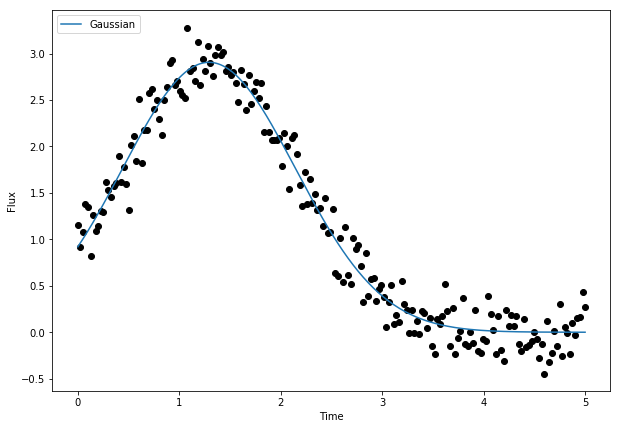

In [38]:
# Plot the data with the best-fit model
plt.figure(figsize=(10,7))
plt.plot(x, y, 'ko')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend(loc=2)

## Astronomical Images

 Images of astronomical objects are usually taken with electronic detectors such as a CCD (Charge Coupled Device). Similar detectors are found in normal digital cameras. Telescope images are nearly always greyscale, but nevertheless contain some colour information. An astronomical image may be taken through a colour filter. Different detectors and telescopes also usually have different sensitivities to different colours (wavelengths).

<img src="images/crab_multiwavelength.jpg" width="230" align="middle">

Source: https://www.spacetelescope.org/projects/fits_liberator/improc/


**Data**

- 1 array of T elements

**MetaData**

- Where we are observing (RA/DEC) 
- Solid angle of the object (area)
- When we are observing (sidereal time) 
- From where we are observing (GPS)
- With which luminosity correction
- With which integration time (exposure) 
- At which resolution (time resolution) 
- Source name, P.I. name, calibration, etc.

In [46]:
'marvin' in sys.modules

True

If not True, then install Astropy:

!pip install sdss-marvin

In [48]:
from marvin.tools.image import Image

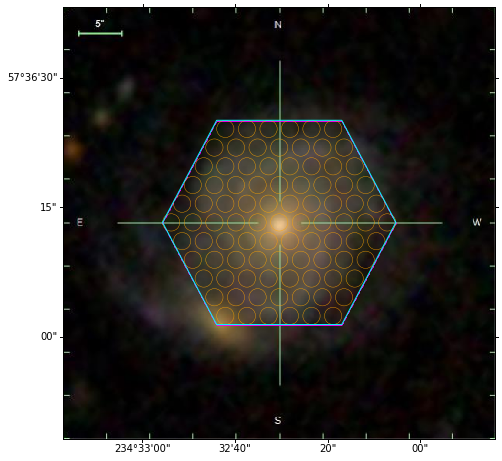

In [49]:
im = Image('8553-9102')
ax = im.plot()

# overlay the IFU fibers
im.overlay_fibers(ax)

# change the style of the hexagon
im.overlay_hexagon(ax, color='cyan', linewidth=1)

### Integral Field Units

IFUs are used in astronomy to study extended objects, such as nebulae, galaxies or a crowded cluster of stars or galaxies in one shot, using a technique known as integral field spectroscopy. In this method, the signal from each cell or pixel of the field is fed into a spectrograph, which then generates a spectrum for each individual pixel. All the resulting spectra are arranged into a datacube which contains the entire 2D field of view plus the third dimension drawn from the spectrograph, which splits the light into its different colours or wavelengths. Astronomers can use the wealth of information from integral field spectrographs to measure, for example, the motion of the gas in a distant galaxy or the distances to the different galaxies found in a field of view.

<img src="images/eso0426i.jpg" width="600" align="middle">

Source: https://www.eso.org/public/usa/teles-instr/technology/ifu/?lang

